In [ ]:
#qs 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn import preprocessing
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras.optimizers import Adam,RMSprop

In [ ]:
da=pd.read_csv("/content/weatherAUS.csv")

In [ ]:
da


In [ ]:
da.info()

In [ ]:
da.isnull().sum()

In [ ]:
from sklearn.preprocessing import LabelEncoder
da[['RainTomorrow','RainToday','WindDir9am','WindDir3pm','WindGustDir','Location','Date']]=da[['RainTomorrow','RainToday','WindDir9am','WindDir3pm','WindGustDir','Location','Date']].apply(LabelEncoder().fit_transform)

In [ ]:
features = da.drop(['RainTomorrow'], axis=1) # dropping target and extra columns
target = da['RainTomorrow']

#Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names)

features.describe().T

In [ ]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='mean')
da.iloc[:,:]=impute.fit_transform(da)
da

In [ ]:
X = da.iloc[:, 3:-1].values
y = da.iloc[:, -1].values
print(X)
print(y)

In [ ]:
#q2 ann
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Initializing the ANN
model = tf.keras.models.Sequential()
# Add the input layer and first hidden layer
model.add(tf.keras.layers.Dense(units=12, activation='relu', input_shape=X_train[0].shape))
# Add the second hidden layer
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
# Add the output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history=model.fit(X_train, y_train, batch_size = 32, epochs =10,validation_split=0.3)

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.show()

In [ ]:
#q3
num_labels = len(np.unique(y_train))

In [ ]:
input_size = X_train.shape[1]
input_size

In [ ]:
#regularisation l2
model2=Sequential()
model2.add(Dense(units=32,input_dim=input_size))
model2.add(Activation('relu'))

model2.add(Dense(units=32,kernel_regularizer=keras.regularizers.l2(0.001)))
model2.add(Activation('relu'))

model2.add(Dense(num_labels))
model2.add(Activation('softmax'))

In [ ]:
model2.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
history1 = model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_split=0.2)

Epoch 1/10
2910/2910 [==============================] - 7s 3ms/step - loss: 0.3949 - accuracy: 0.8098 - val_loss: 0.3912 - val_accuracy: 0.8082
Epoch 2/10
2910/2910 [==============================] - 6s 2ms/step - loss: 0.3939 - accuracy: 0.8085 - val_loss: 0.3839 - val_accuracy: 0.8141
Epoch 3/10
2910/2910 [==============================] - 7s 3ms/step - loss: 0.3902 - accuracy: 0.8095 - val_loss: 0.4362 - val_accuracy: 0.7706
Epoch 4/10
2910/2910 [==============================] - 6s 2ms/step - loss: 0.3897 - accuracy: 0.8091 - val_loss: 0.3818 - val_accuracy: 0.8162
Epoch 5/10
2910/2910 [==============================] - 6s 2ms/step - loss: 0.3872 - accuracy: 0.8100 - val_loss: 0.4055 - val_accuracy: 0.7906
Epoch 6/10
2910/2910 [==============================] - 6s 2ms/step - loss: 0.3859 - accuracy: 0.8097 - val_loss: 0.3786 - val_accuracy: 0.8118
Epoch 7/10
2910/2910 [==============================] - 6s 2ms/step - loss: 0.3854 - accuracy: 0.8098 - val_loss: 0.3804 - val_accuracy:

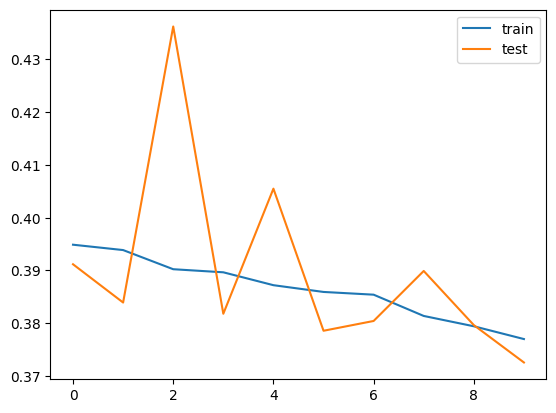

In [ ]:
plt.plot(history1.history['loss'],label='train')
plt.plot(history1.history['val_loss'],label='test')
plt.legend()
plt.show()

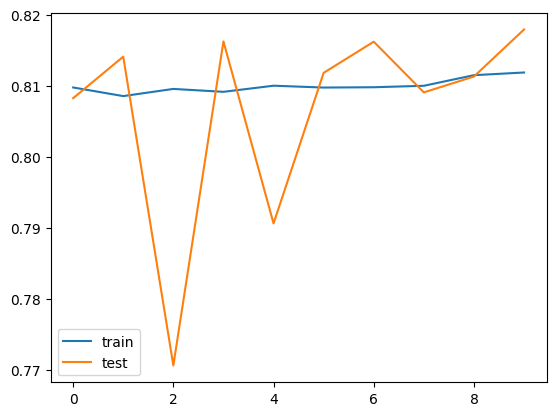

In [ ]:
plt.plot(history1.history['accuracy'],label='train')
plt.plot(history1.history['val_accuracy'],label='test')
plt.legend()
plt.show()

In [ ]:
#regularisation l1
model3=Sequential()
model3.add(Dense(units=32,input_dim=input_size))
model3.add(Activation('relu'))

model3.add(Dense(units=32,kernel_regularizer=keras.regularizers.l1(0.001)))
model3.add(Activation('relu'))

model3.add(Dense(num_labels))
model3.add(Activation('softmax'))

In [ ]:
model3.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
history2 = model.fit(X_train, y_train, batch_size = 32, epochs = 20, validation_split=0.2)

Epoch 1/20
2910/2910 [==============================] - 6s 2ms/step - loss: 0.3750 - accuracy: 0.8126 - val_loss: 0.3746 - val_accuracy: 0.8178
Epoch 2/20
2910/2910 [==============================] - 6s 2ms/step - loss: 0.3741 - accuracy: 0.8114 - val_loss: 0.3842 - val_accuracy: 0.8004
Epoch 3/20
2910/2910 [==============================] - 6s 2ms/step - loss: 0.3694 - accuracy: 0.8139 - val_loss: 0.3598 - val_accuracy: 0.8192
Epoch 4/20
2910/2910 [==============================] - 6s 2ms/step - loss: 0.3684 - accuracy: 0.8130 - val_loss: 0.3683 - val_accuracy: 0.8177
Epoch 5/20
2910/2910 [==============================] - 6s 2ms/step - loss: 0.3710 - accuracy: 0.8127 - val_loss: 0.3561 - val_accuracy: 0.8194
Epoch 6/20
2910/2910 [==============================] - 7s 2ms/step - loss: 0.3641 - accuracy: 0.8138 - val_loss: 0.3563 - val_accuracy: 0.8196
Epoch 7/20
2910/2910 [==============================] - 6s 2ms/step - loss: 0.3619 - accuracy: 0.8146 - val_loss: 0.3515 - val_accuracy:

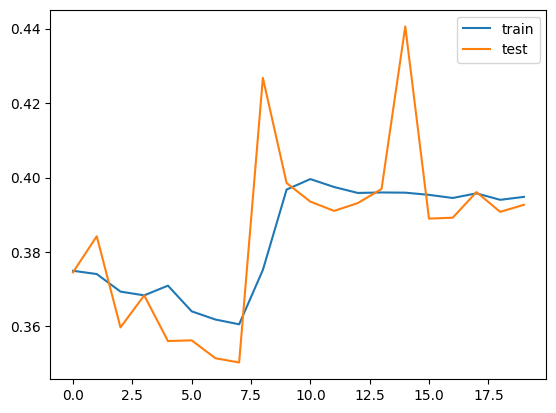

In [ ]:
plt.plot(history2.history['loss'],label='train')
plt.plot(history2.history['val_loss'],label='test')
plt.legend()
plt.show()

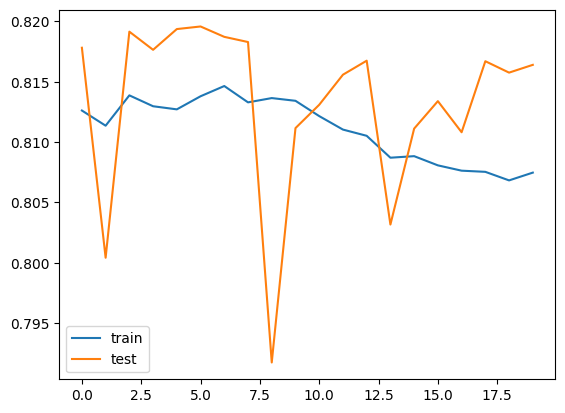

In [ ]:
plt.plot(history2.history['accuracy'],label='train')
plt.plot(history2.history['val_accuracy'],label='test')
plt.legend()
plt.show()

In [ ]:
#early stopping
from keras.callbacks import EarlyStopping

In [ ]:
model4=Sequential()
model4.add(Dense(units=32,input_dim=input_size))
model4.add(Activation('relu'))

model4.add(Dense(units=32))
model4.add(Activation('relu'))
model4.add(Dropout(0.45))

model4.add(Dense(num_labels))
model4.add(Activation('softmax'))

In [ ]:
model4.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
e=EarlyStopping(monitor='val_loss',mode='min',verbose=1)

In [ ]:
historye=model4.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3000,verbose=0,callbacks=[e])

Epoch 3: early stopping


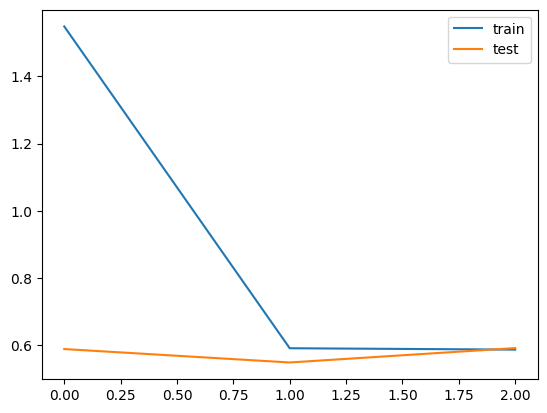

In [ ]:
plt.plot(historye.history['loss'],label='train')
plt.plot(historye.history['val_loss'],label='test')
plt.legend()
plt.show()

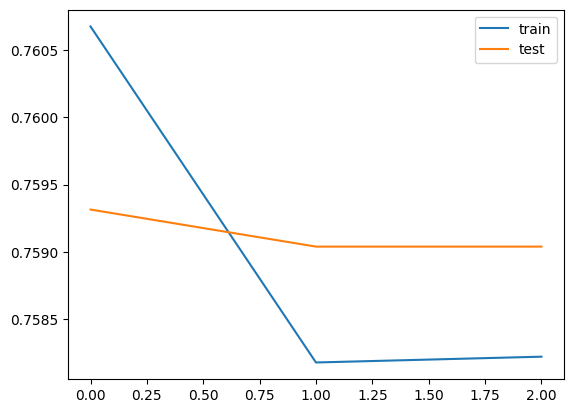

In [ ]:
plt.plot(historye.history['accuracy'],label='train')
plt.plot(historye.history['val_accuracy'],label='test')
plt.legend()
plt.show()